### March 2023: END SEMESTER ASSESSMENT (ESA)
## M TECH DATA SCIENCE AND MACHINE LEARNING_ SEMESTER II

### UE20CS935: Introduction to Deep Learning and Applications


Question 1: Build a Convolution Neural Network to classify the 6 different species of Butterfly images. Dataset_Folder Name: Butterflies_classification_dataset	(10 marks)<br>
Data pre-processing<br>
Conditions to consider:<br>
    1. Parameters should not cross 300000  <br>
    2. Should not use more than 4 layers (except input and output, including convolution and dense layers) <br>
    3. Use Adam Optimizer


In [33]:
import os
import cv2

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Dense, Flatten, GlobalMaxPooling2D, MaxPool2D, Input, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import segmentation_models as sm

from sklearn.model_selection import train_test_split
from PIL import Image
import matplotlib.pyplot as plt

os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

In [4]:
train_dir="Butterflies_classification_dataset/train"
test_dir="Butterflies_classification_dataset/test"

In [3]:
train_image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_image_generator = ImageDataGenerator(rescale=1./255)

In [5]:
target_size = (64, 64)
train_data_generator = train_image_generator.flow_from_directory(train_dir, 
                                                                 target_size=target_size, subset='training', shuffle=True)

validation_data_generator = train_image_generator.flow_from_directory(train_dir, 
                                                                 target_size=target_size, subset='validation', shuffle=True)

test_data_generator = test_image_generator.flow_from_directory(test_dir, target_size=target_size)


Found 384 images belonging to 6 classes.
Found 96 images belonging to 6 classes.
Found 151 images belonging to 6 classes.


In [6]:
model = Sequential()
model.add(Conv2D(64, 3, activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPool2D())
model.add(Conv2D(32, 3, activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(6, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 6)                 3

In [7]:
model.fit(train_data_generator, validation_data=validation_data_generator, epochs=3)

Epoch 1/3
12/12 [==============================] - 7s 510ms/step - loss: 1.6785 - accuracy: 0.3099 - val_loss: 1.4829 - val_accuracy: 0.4583
Epoch 2/3
12/12 [==============================] - 3s 213ms/step - loss: 1.2035 - accuracy: 0.6172 - val_loss: 1.0029 - val_accuracy: 0.6562
Epoch 3/3
12/12 [==============================] - 3s 215ms/step - loss: 0.8223 - accuracy: 0.7422 - val_loss: 0.8923 - val_accuracy: 0.7292


In [8]:
loss, accuracy = model.evaluate(test_data_generator)
print(f'Base Model Accuracy: {accuracy:.2f}')

5/5 [==============================] - 2s 330ms/step - loss: 1.1283 - accuracy: 0.5960
Base Model Accuracy: 0.60


#### Question No:2  (15 marks)
Improve the baseline model performance and save the weights of improved model

<u> **Conditions to consider** </u>

Apply Data Augmentation if required (5 marks)<br>
No parameter limit  (2 marks)<br>
Can use any number of layers (2 marks)<br>
Use any optimizers of your choice  (3 marks)<br>
Use early stopping and save best model callbacks (8 marks)<br>



In [9]:
train_image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2, rotation_range=60, 
                                           zoom_range=0.2, shear_range=0.2, width_shift_range=0.2,
                                          height_shift_range=0.2, horizontal_flip=True)
test_image_generator = ImageDataGenerator(rescale=1./255)

target_size = (128, 128)
train_data_generator = train_image_generator.flow_from_directory(train_dir, 
                                                                 target_size=target_size, subset='training', shuffle=True)

validation_data_generator = train_image_generator.flow_from_directory(train_dir, 
                                                                 target_size=target_size, subset='validation', shuffle=True)

test_data_generator = test_image_generator.flow_from_directory(test_dir, target_size=target_size)


Found 384 images belonging to 6 classes.
Found 96 images belonging to 6 classes.
Found 151 images belonging to 6 classes.


In [10]:
model = Sequential()
model.add(Conv2D(200, 3, activation='relu', input_shape=(128, 128, 3)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(MaxPool2D())
model.add(Conv2D(100, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(MaxPool2D())
model.add(Conv2D(100, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(MaxPool2D())
model.add(Conv2D(100, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(6, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 126, 200)     5600      
                                                                 
 batch_normalization (Batch  (None, 126, 126, 200)     800       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 126, 126, 200)     0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 63, 63, 200)       0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 100)       180100    
                                                                 
 batch_normalization_1 (Bat  (None, 61, 61, 100)      

In [11]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint(filepath='best_optimized_model', save_best_only=True)

model.fit(train_data_generator, validation_data=validation_data_generator, epochs=3, callbacks=[early_stop, model_checkpoint])

Epoch 1/3
12/12 [==============================] - ETA: 0s - loss: 2.7223 - accuracy: 0.3646INFO:tensorflow:Assets written to: best_optimized_model\assets


INFO:tensorflow:Assets written to: best_optimized_model\assets


12/12 [==============================] - 43s 3s/step - loss: 2.7223 - accuracy: 0.3646 - val_loss: 1.7730 - val_accuracy: 0.1667
Epoch 2/3
12/12 [==============================] - 39s 3s/step - loss: 1.4280 - accuracy: 0.5781 - val_loss: 2.3568 - val_accuracy: 0.2604
Epoch 3/3
12/12 [==============================] - 40s 3s/step - loss: 1.1150 - accuracy: 0.6302 - val_loss: 2.8785 - val_accuracy: 0.1771


In [17]:
loss, accuracy = model.evaluate(test_data_generator)
print(f'Optimized Model Accuracy: {accuracy:.2f}')

5/5 [==============================] - 3s 507ms/step - loss: 1.8026 - accuracy: 0.1854
Optimized Model Accuracy: 0.19


#### Section C: Question 4: **(15 Marks)**

Use the Transfer learning technique to improve the previous section model’s classification performance.

The pre-trained models weights are given to you. The architecture of pre-trained model till convolution layers and its corresponding weights are already saved under the folder **‘base_model’**. The given model convolution layers are already freezed. (Note: This pre-trained model is MobileNet)

<u>Load these weights along with architecture using the following syntax:</u>

- cust_model=tf.keras.models.load_model("base_model")

- “base_model” is the folder name under all the required models files are exist.

Design the remaining layers of network in your own way (from flattening to output layer) and train only its weights with the dataset given.

In [ ]:
train_dir="Butterflies_classification_dataset/train"
test_dir="Butterflies_classification_dataset/test"

In [13]:
base_model = tf.keras.models.load_model('base_model')
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1_pad (ZeroPadding2D)   (None, 225, 225, 3)          0         ['input_3[0][0]']             
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['Conv1_pad[0][0]']           
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                           

 rmalization)                                                                                     
                                                                                                  
 block_3_expand_relu (ReLU)  (None, 56, 56, 144)          0         ['block_3_expand_BN[0][0]']   
                                                                                                  
 block_3_pad (ZeroPadding2D  (None, 57, 57, 144)          0         ['block_3_expand_relu[0][0]'] 
 )                                                                                                
                                                                                                  
 block_3_depthwise (Depthwi  (None, 28, 28, 144)          1296      ['block_3_pad[0][0]']         
 seConv2D)                                                                                        
                                                                                                  
 block_3_d

 seConv2D)                                                                                        
                                                                                                  
 block_6_depthwise_BN (Batc  (None, 14, 14, 192)          768       ['block_6_depthwise[0][0]']   
 hNormalization)                                                                                  
                                                                                                  
 block_6_depthwise_relu (Re  (None, 14, 14, 192)          0         ['block_6_depthwise_BN[0][0]']
 LU)                                                                                              
                                                                                                  
 block_6_project (Conv2D)    (None, 14, 14, 64)           12288     ['block_6_depthwise_relu[0][0]
                                                                    ']                            
          

 block_9_project_BN (BatchN  (None, 14, 14, 64)           256       ['block_9_project[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_9_add (Add)           (None, 14, 14, 64)           0         ['block_8_add[0][0]',         
                                                                     'block_9_project_BN[0][0]']  
                                                                                                  
 block_10_expand (Conv2D)    (None, 14, 14, 384)          24576     ['block_9_add[0][0]']         
                                                                                                  
 block_10_expand_BN (BatchN  (None, 14, 14, 384)          1536      ['block_10_expand[0][0]']     
 ormalization)                                                                                    
          

 block_13_expand_BN (BatchN  (None, 14, 14, 576)          2304      ['block_13_expand[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_13_expand_relu (ReLU  (None, 14, 14, 576)          0         ['block_13_expand_BN[0][0]']  
 )                                                                                                
                                                                                                  
 block_13_pad (ZeroPadding2  (None, 15, 15, 576)          0         ['block_13_expand_relu[0][0]']
 D)                                                                                               
                                                                                                  
 block_13_depthwise (Depthw  (None, 7, 7, 576)            5184      ['block_13_pad[0][0]']        
 iseConv2D

                                                                                                  
 block_16_depthwise (Depthw  (None, 7, 7, 960)            8640      ['block_16_expand_relu[0][0]']
 iseConv2D)                                                                                       
                                                                                                  
 block_16_depthwise_BN (Bat  (None, 7, 7, 960)            3840      ['block_16_depthwise[0][0]']  
 chNormalization)                                                                                 
                                                                                                  
 block_16_depthwise_relu (R  (None, 7, 7, 960)            0         ['block_16_depthwise_BN[0][0]'
 eLU)                                                               ]                             
                                                                                                  
 block_16_

In [14]:
train_image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2, rotation_range=60, 
                                           zoom_range=0.2, shear_range=0.2, width_shift_range=0.2,
                                          height_shift_range=0.2, horizontal_flip=True,
                                          preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input)
test_image_generator = ImageDataGenerator(rescale=1./255,
                                         preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input)

target_size = (224, 224)
train_data_generator = train_image_generator.flow_from_directory(train_dir, 
                                                                 target_size=target_size, subset='training', shuffle=True)

validation_data_generator = train_image_generator.flow_from_directory(train_dir, 
                                                                 target_size=target_size, subset='validation', shuffle=True)

test_data_generator = test_image_generator.flow_from_directory(test_dir, target_size=target_size)


Found 384 images belonging to 6 classes.
Found 96 images belonging to 6 classes.
Found 151 images belonging to 6 classes.


In [15]:
inputs = Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
p = GlobalMaxPooling2D()(x)
outputs = Dense(6, activation='softmax')(p)

model = Model(inputs, outputs)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_max_pooling2d (Glob  (None, 1280)              0         
 alMaxPooling2D)                                                 
                                                                 
 dense_2 (Dense)             (None, 6)                 7686      
                                                                 
Total params: 2265670 (8.64 MB)
Trainable params: 7686 (30.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [16]:
model_checkpoint = ModelCheckpoint(filepath='best_tl_model', save_best_only=True)
model.fit(train_data_generator, validation_data=validation_data_generator, epochs=3, 
          callbacks=[early_stop, model_checkpoint])

Epoch 1/3
12/12 [==============================] - ETA: 0s - loss: 2.5448 - accuracy: 0.1901INFO:tensorflow:Assets written to: best_tl_model\assets


INFO:tensorflow:Assets written to: best_tl_model\assets


12/12 [==============================] - 29s 2s/step - loss: 2.5448 - accuracy: 0.1901 - val_loss: 2.0071 - val_accuracy: 0.1979
Epoch 2/3
12/12 [==============================] - ETA: 0s - loss: 1.7968 - accuracy: 0.2682INFO:tensorflow:Assets written to: best_tl_model\assets


INFO:tensorflow:Assets written to: best_tl_model\assets


12/12 [==============================] - 25s 2s/step - loss: 1.7968 - accuracy: 0.2682 - val_loss: 1.6987 - val_accuracy: 0.2604
Epoch 3/3
12/12 [==============================] - ETA: 0s - loss: 1.7847 - accuracy: 0.3021INFO:tensorflow:Assets written to: best_tl_model\assets


INFO:tensorflow:Assets written to: best_tl_model\assets


12/12 [==============================] - 26s 2s/step - loss: 1.7847 - accuracy: 0.3021 - val_loss: 1.6595 - val_accuracy: 0.3333


In [19]:
loss, accuracy = model.evaluate(test_data_generator)
print(f'TL Accuracy: {accuracy:.2f}')

5/5 [==============================] - 3s 468ms/step - loss: 1.8026 - accuracy: 0.1854
TL Accuracy: 0.19


#### Section C: Question 5:    (15 Marks)

<u>**The Problem Statement**</u>

The human gastrointestinal (GI) tract is made up of different sections, one of them being the large bowel. Several types of anomalies and diseases can affect the large bowel, such as colorectal cancer. Colorectal cancer is the second most common cancer type among women and third most common among men. Polyps are precursors to colorectal cancer, and is found in nearly half of the individuals at age 50 having a screening colonoscopy, and are increasing with age. Colonoscopy is the gold standard for detection and assessment of these polyps with subsequent biopsy and removal of the polyps. Early disease detection has a huge impact on survival from colorectal cancer, and polyp detection is therefore important. In addition, several studies have shown that polyps are often overlooked during colonoscopies, with polyp miss rates of 14%-30% depending on the type and size of the polyps. Increasing the detection of polyps has been shown to decrease risk of colorectal cancer. Thus, automatic detection of more polyps at an early stage can play a crucial role in improving both prevention of and survival from colorectal cancer.

<u> **Dataset Details** </u> 

The dataset contains 247 polyp images and their corresponding masks.The resolution of the images varies from 332x487 to 1920x1072 pixels. The images and its corresponding masks are stored in two separate folders. Find the dataset under the folder **“polyp_segmentation_dataset”**.

<u> **The Task** </u> 

Develop a Semantic segmentation model using Unet architecture on the given dataset.

Students can make use of pre-trained Unet segmentation model using the library
 - **import segmentation_models as sm**

<u> **Hints** </u>

1. Load all the images in one array of size 247x128x128x1
    Where 247 is total number of trained images,
    128x128x1 is each image size
2. Load all the masks in one array of size 247x128x128x1
3. Scale both the above two arrays
4. Split the data into train and test
5. Define the pre-trained segmentation model. Use encoder_weight=None, If internet access is not available.
6. Compile with appropriate loss and metric and fit the data into it.
7. Reduce the batch_size to 1 or 2, if you get any memory related error 

**Run the model for minimum 2 epochs and present your result. The solution will be evaluated based on approach only as it take lot of epochs to produce good result.**


In [20]:
image_dir= 'polyp_segmentation_dataset/images/'
mask_dir = 'polyp_segmentation_dataset/masks/'

In [41]:
size = 128
image_dataset = []
mask_dataset = []

images = os.listdir(image_dir)
print(len(images))

for _, image_name in enumerate(images):
    if image_name.split('.')[-1]== 'jpg':
        image = cv2.imread(image_dir + image_name, cv2.IMREAD_COLOR)
        image = Image.fromarray(image)
        image = image.resize((size, size))
        image_dataset.append(np.array(image))


masks = os.listdir(mask_dir)
print(len(masks))

for _, image_name in enumerate(masks):
    if image_name.split('.')[-1]== 'jpg':
        image = cv2.imread(mask_dir + image_name, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (size, size))
        (threshold, bwimage) = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
        image = Image.fromarray(bwimage)
        mask_dataset.append(np.array(bwimage))

247
247


In [42]:
import numpy as np
image_dataset = np.array(image_dataset)
image_dataset.shape

(247, 128, 128, 3)

In [43]:
mask_dataset = np.array(mask_dataset)
mask_dataset = np.where(mask_dataset > 0.5, 1, 0).astype('float32')
mask_dataset = np.expand_dims(mask_dataset, axis=3)
mask_dataset.shape

(247, 128, 128, 1)

In [50]:
x_train, x_test, y_train, y_test = train_test_split(image_dataset, mask_dataset, test_size=0.2, random_state=43)

backbone = 'resnet34'
processing_func = sm.get_preprocessing(backbone)
x_train_preprocessed = processing_func(x_train)
x_test_preprocessed = processing_func(x_test)

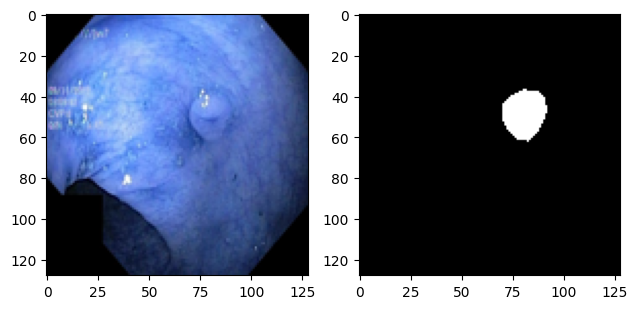

In [45]:
n = np.random.randint(1, len(image_dataset))

plt.subplot(1, 2, 1)
plt.imshow(image_dataset[n, :, :, :])

plt.subplot(1, 2, 2)
plt.imshow(mask_dataset[n, :, :, :], cmap='gray')

plt.tight_layout()
plt.show()

In [52]:
model = sm.Unet(backbone_name=backbone, encoder_weights=None, classes=1, activation='sigmoid', input_shape=(128, 128, 3))

model.compile(optimizer='adam', loss=sm.losses.bce_jaccard_loss, metrics=[sm.metrics.iou_score])
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 data (InputLayer)           [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 bn_data (BatchNormalizatio  (None, 128, 128, 3)          9         ['data[0][0]']                
 n)                                                                                               
                                                                                                  
 zero_padding2d_34 (ZeroPad  (None, 134, 134, 3)          0         ['bn_data[0][0]']             
 ding2D)                                                                                          
                                                                                            

                                                                                                  
 zero_padding2d_40 (ZeroPad  (None, 34, 34, 64)           0         ['stage1_unit3_relu1[0][0]']  
 ding2D)                                                                                          
                                                                                                  
 stage1_unit3_conv1 (Conv2D  (None, 32, 32, 64)           36864     ['zero_padding2d_40[0][0]']   
 )                                                                                                
                                                                                                  
 stage1_unit3_bn2 (BatchNor  (None, 32, 32, 64)           256       ['stage1_unit3_conv1[0][0]']  
 malization)                                                                                      
                                                                                                  
 stage1_un

                                                                                                  
 zero_padding2d_46 (ZeroPad  (None, 18, 18, 128)          0         ['stage2_unit3_relu1[0][0]']  
 ding2D)                                                                                          
                                                                                                  
 stage2_unit3_conv1 (Conv2D  (None, 16, 16, 128)          147456    ['zero_padding2d_46[0][0]']   
 )                                                                                                
                                                                                                  
 stage2_unit3_bn2 (BatchNor  (None, 16, 16, 128)          512       ['stage2_unit3_conv1[0][0]']  
 malization)                                                                                      
                                                                                                  
 stage2_un

                                                                                                  
 zero_padding2d_52 (ZeroPad  (None, 10, 10, 256)          0         ['stage3_unit2_relu1[0][0]']  
 ding2D)                                                                                          
                                                                                                  
 stage3_unit2_conv1 (Conv2D  (None, 8, 8, 256)            589824    ['zero_padding2d_52[0][0]']   
 )                                                                                                
                                                                                                  
 stage3_unit2_bn2 (BatchNor  (None, 8, 8, 256)            1024      ['stage3_unit2_conv1[0][0]']  
 malization)                                                                                      
                                                                                                  
 stage3_un

 ding2D)                                                                                          
                                                                                                  
 stage3_unit5_conv1 (Conv2D  (None, 8, 8, 256)            589824    ['zero_padding2d_58[0][0]']   
 )                                                                                                
                                                                                                  
 stage3_unit5_bn2 (BatchNor  (None, 8, 8, 256)            1024      ['stage3_unit5_conv1[0][0]']  
 malization)                                                                                      
                                                                                                  
 stage3_unit5_relu2 (Activa  (None, 8, 8, 256)            0         ['stage3_unit5_bn2[0][0]']    
 tion)                                                                                            
          

 ding2D)                                                                                          
                                                                                                  
 stage4_unit2_conv1 (Conv2D  (None, 4, 4, 512)            2359296   ['zero_padding2d_64[0][0]']   
 )                                                                                                
                                                                                                  
 stage4_unit2_bn2 (BatchNor  (None, 4, 4, 512)            2048      ['stage4_unit2_conv1[0][0]']  
 malization)                                                                                      
                                                                                                  
 stage4_unit2_relu2 (Activa  (None, 4, 4, 512)            0         ['stage4_unit2_bn2[0][0]']    
 tion)                                                                                            
          

 decoder_stage1a_conv (Conv  (None, 16, 16, 128)          442368    ['decoder_stage1_concat[0][0]'
 2D)                                                                ]                             
                                                                                                  
 decoder_stage1a_bn (BatchN  (None, 16, 16, 128)          512       ['decoder_stage1a_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 decoder_stage1a_relu (Acti  (None, 16, 16, 128)          0         ['decoder_stage1a_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 decoder_stage1b_conv (Conv  (None, 16, 16, 128)          147456    ['decoder_stage1a_relu[0][0]']
 2D)      

 decoder_stage4b_bn (BatchN  (None, 128, 128, 16)         64        ['decoder_stage4b_conv[0][0]']
 ormalization)                                                                                    
                                                                                                  
 decoder_stage4b_relu (Acti  (None, 128, 128, 16)         0         ['decoder_stage4b_bn[0][0]']  
 vation)                                                                                          
                                                                                                  
 final_conv (Conv2D)         (None, 128, 128, 1)          145       ['decoder_stage4b_relu[0][0]']
                                                                                                  
 sigmoid (Activation)        (None, 128, 128, 1)          0         ['final_conv[0][0]']          
                                                                                                  
Total para

In [53]:
early_stop = EarlyStopping(restore_best_weights=True, patience=10, min_delta=0.01)
model_checkpoint = ModelCheckpoint(filepath='best_tl_model', save_best_only=True)

model.fit(x_train_prepprocessed, y_train, epochs=10, 
          callbacks=[early_stop, model_checkpoint], validation_data=(x_test_preprocessed, y_test))

Epoch 1/10
7/7 [==============================] - ETA: 0s - loss: 1.4514 - iou_score: 0.1665INFO:tensorflow:Assets written to: best_tl_model\assets


INFO:tensorflow:Assets written to: best_tl_model\assets


7/7 [==============================] - 60s 8s/step - loss: 1.4514 - iou_score: 0.1665 - val_loss: 101456.1406 - val_iou_score: 0.0018
Epoch 2/10
7/7 [==============================] - ETA: 0s - loss: 1.2292 - iou_score: 0.2159INFO:tensorflow:Assets written to: best_tl_model\assets


INFO:tensorflow:Assets written to: best_tl_model\assets


7/7 [==============================] - 48s 7s/step - loss: 1.2292 - iou_score: 0.2159 - val_loss: 53822.0859 - val_iou_score: 0.1944
Epoch 3/10
7/7 [==============================] - 30s 4s/step - loss: 1.1034 - iou_score: 0.2437 - val_loss: 129535.7891 - val_iou_score: 0.1875
Epoch 4/10
7/7 [==============================] - ETA: 0s - loss: 0.9861 - iou_score: 0.3127INFO:tensorflow:Assets written to: best_tl_model\assets


INFO:tensorflow:Assets written to: best_tl_model\assets


7/7 [==============================] - 48s 7s/step - loss: 0.9861 - iou_score: 0.3127 - val_loss: 17729.1992 - val_iou_score: 0.1612
Epoch 5/10
7/7 [==============================] - ETA: 0s - loss: 0.9939 - iou_score: 0.3146     INFO:tensorflow:Assets written to: best_tl_model\assets


INFO:tensorflow:Assets written to: best_tl_model\assets


7/7 [==============================] - 32659s 5442s/step - loss: 0.9939 - iou_score: 0.3146 - val_loss: 17333.1406 - val_iou_score: 0.1818
Epoch 6/10
7/7 [==============================] - ETA: 0s - loss: 0.9186 - iou_score: 0.3710INFO:tensorflow:Assets written to: best_tl_model\assets


INFO:tensorflow:Assets written to: best_tl_model\assets


7/7 [==============================] - 58s 9s/step - loss: 0.9186 - iou_score: 0.3710 - val_loss: 3781.3691 - val_iou_score: 0.2026
Epoch 7/10
7/7 [==============================] - 33s 5s/step - loss: 0.8506 - iou_score: 0.4062 - val_loss: 10873.7646 - val_iou_score: 0.1793
Epoch 8/10
7/7 [==============================] - ETA: 0s - loss: 0.8360 - iou_score: 0.4055INFO:tensorflow:Assets written to: best_tl_model\assets


INFO:tensorflow:Assets written to: best_tl_model\assets


7/7 [==============================] - 58s 9s/step - loss: 0.8360 - iou_score: 0.4055 - val_loss: 1755.2108 - val_iou_score: 0.1701
Epoch 9/10
7/7 [==============================] - ETA: 0s - loss: 0.7363 - iou_score: 0.4685INFO:tensorflow:Assets written to: best_tl_model\assets


INFO:tensorflow:Assets written to: best_tl_model\assets


7/7 [==============================] - 69s 11s/step - loss: 0.7363 - iou_score: 0.4685 - val_loss: 1055.6040 - val_iou_score: 0.1860
Epoch 10/10
7/7 [==============================] - ETA: 0s - loss: 0.7267 - iou_score: 0.5009INFO:tensorflow:Assets written to: best_tl_model\assets


INFO:tensorflow:Assets written to: best_tl_model\assets


7/7 [==============================] - 54s 8s/step - loss: 0.7267 - iou_score: 0.5009 - val_loss: 121.4727 - val_iou_score: 0.1584


In [54]:
n1 = np.random.randint(0, len(x_test))
test_image = x_test_preprocessed[n1]
test_image_input = np.expand_dims(test_image, axis=0)
print(test_image_input.shape)

predicted_image = model.predict(test_image_input)
print(predicted_image.shape)
predicted_image = (predicted_image[0, :, :, 0] > 0.5).astype(np.uint8)

(1, 128, 128, 3)
1/1 [==============================] - 1s 877ms/step
(1, 128, 128, 1)


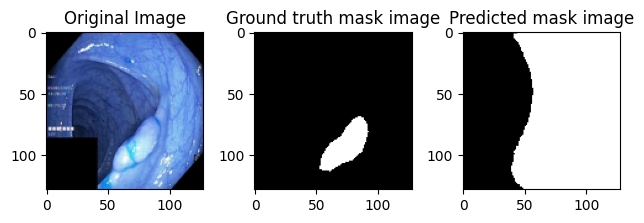

In [55]:
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(test_image[:, :, :])

plt.subplot(1, 3, 2)
plt.title('Ground truth mask image')
plt.imshow(y_test[n1][:, :, :], cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Predicted mask image')
plt.imshow(predicted_image, cmap='gray')

plt.tight_layout()
plt.show()